### Titanic survivors prediction project

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('titanic_dataset.csv')
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# calculating the LINEAR correlation between "Survived" and every other numerical feature
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr()['Survived'].sort_values(ascending=False)
print(corr_matrix)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Treat missing data and change "AGE" to int, "Sex" to binary and "Embarked" to numeric.  
Exclude unneccessary data.

In [8]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# changing "Embarked" and "Sex" to numeric
# using "S" because it's the most common value from "Embarked"
# also there are only 2 missing values in "Embarked", so that is an easy solution
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, "Q": 2})
df['Embarked'] = df['Embarked'].astype('int64')

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(df['Embarked'].value_counts())

Embarked
0    646
1    168
2     77
Name: count, dtype: int64


The correlation between "Age" and "Survived" is extremely low, so the age imputation will be simple, based on the "Age" mean.

In [11]:
# imput Age using the mean
# create new column, with imputed values to compare results
mean_age = round(df['Age'].mean())
df['Age_imputed'] = df['Age']
df['Age_imputed'].fillna(mean_age, inplace=True)
df['Age_imputed'] = df['Age_imputed'].astype('int64')

# verify if there is any null value
print(df['Age'].isnull().sum(), df['Age_imputed'].isnull().sum())

177 0


In [12]:
# creating a feature 'Age' with null data excluded
df['Age_dropped'] = df['Age']
df.dropna(subset=['Age_dropped'], inplace=True)
print(df['Age_dropped'].isnull().sum())

0


#### Initiating prediction with different algorithms

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     714 non-null    int64  
 1   Pclass       714 non-null    int64  
 2   Sex          714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Ticket       714 non-null    object 
 7   Fare         714 non-null    float64
 8   Cabin        185 non-null    object 
 9   Embarked     714 non-null    int64  
 10  Age_imputed  714 non-null    int64  
 11  Age_dropped  714 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 72.5+ KB


In [14]:
# choosing features and target
# using 'Age' with missing values
X = df[['Pclass', 'Sex', 'Age_imputed', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
y = df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(penalty='l2', max_iter=1000) # Ridge regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

Accuracy: 0.7534883720930232
Confusion Matrix: 
[[104  22]
 [ 31  58]]
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       126
           1       0.72      0.65      0.69        89

    accuracy                           0.75       215
   macro avg       0.75      0.74      0.74       215
weighted avg       0.75      0.75      0.75       215



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8
Confusion Matrix:
[[109  17]
 [ 26  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.79      0.71      0.75        89

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215



In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

# print the best parameters found from grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# evaluate the model using cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Mean Accuracy:", cross_val_scores.mean())

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8194129813848123
Cross-Validation Mean Accuracy: 0.8194129813848123


#### Response data balance using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

X_oversampled = df[['Pclass', 'Sex', 'Age_imputed', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
y_oversampled = df['Survived']

smote = SMOTE(random_state=42)

# apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_oversampled, y_oversampled)

# show classes before and after SMOTE
print("Classes before SMOTE:", y.value_counts())
print("Classes after SMOTE:", y_resampled.value_counts())

Classes before SMOTE: Survived
0    424
1    290
Name: count, dtype: int64
Classes after SMOTE: Survived
0    424
1    424
Name: count, dtype: int64


In [19]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled,
                                                     y_oversampled, 
                                                     test_size=0.3, 
                                                     random_state=42)

# initialize random forest with grid search best parameters
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=200, random_state=42)

rf_classifier.fit(X_train_over, y_train_over)

# make predictions
y_pred_over = rf_classifier.predict(X_test_over)

# evaluate model
accuracy = accuracy_score(y_test_over, y_pred_over)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test_over, y_pred_over)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_test_over, y_pred_over)
print("Classification Report:")
print(report)

Accuracy: 0.8093023255813954
Confusion Matrix:
[[112  14]
 [ 27  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       126
           1       0.82      0.70      0.75        89

    accuracy                           0.81       215
   macro avg       0.81      0.79      0.80       215
weighted avg       0.81      0.81      0.81       215



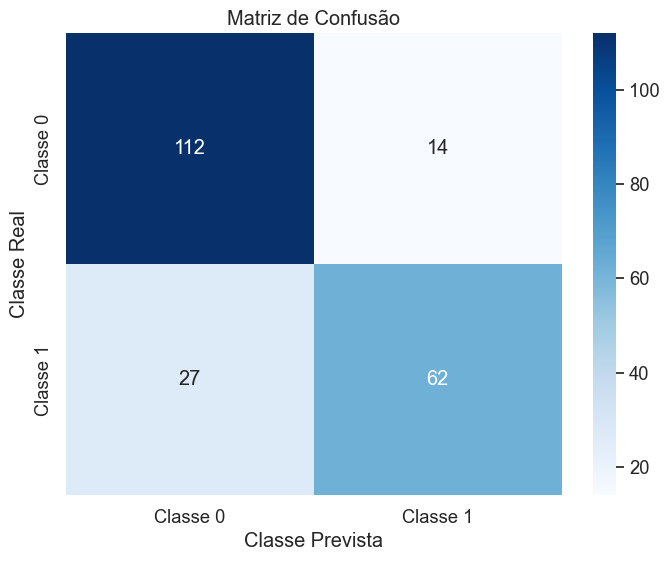

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Classe 0', 'Classe 1']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()
